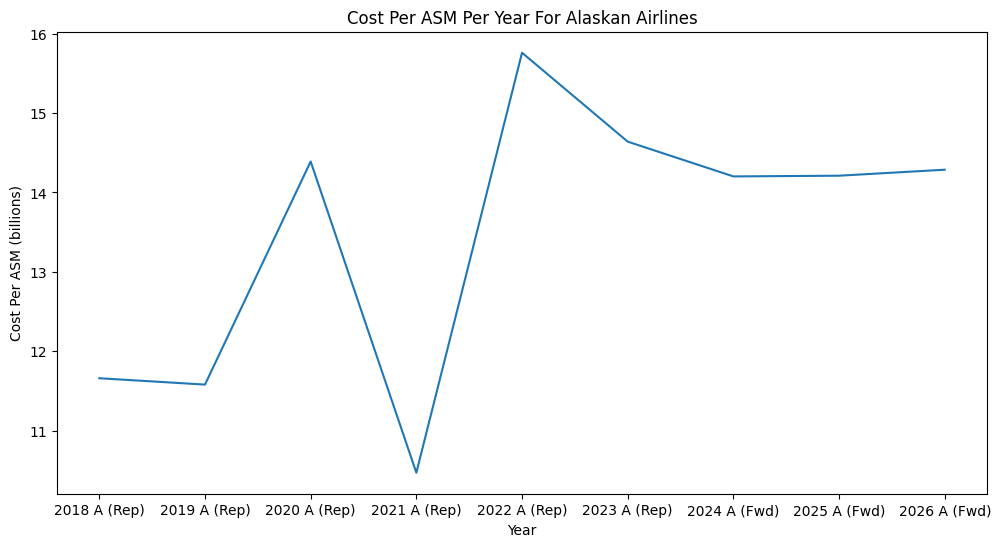

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './AirlineFinancials/Alaska_Airlines.xlsx' 
sheet_name = 'Alaska Airlines' 
data = pd.read_excel(file_path, sheet_name=sheet_name)

years = data.iloc[1]
years = years[4:]
years = years[::-1]
cost_per_asm = data.iloc[22]
cost_per_asm = cost_per_asm[4:]
aa_cost_per_asm = cost_per_asm[::-1]

plt.figure(figsize=(12, 6))  
plt.plot(years, aa_cost_per_asm)
plt.title('Cost Per ASM Per Year For Alaskan Airlines')
plt.xlabel('Year')
plt.ylabel('Cost Per ASM (billions)')
plt.show()

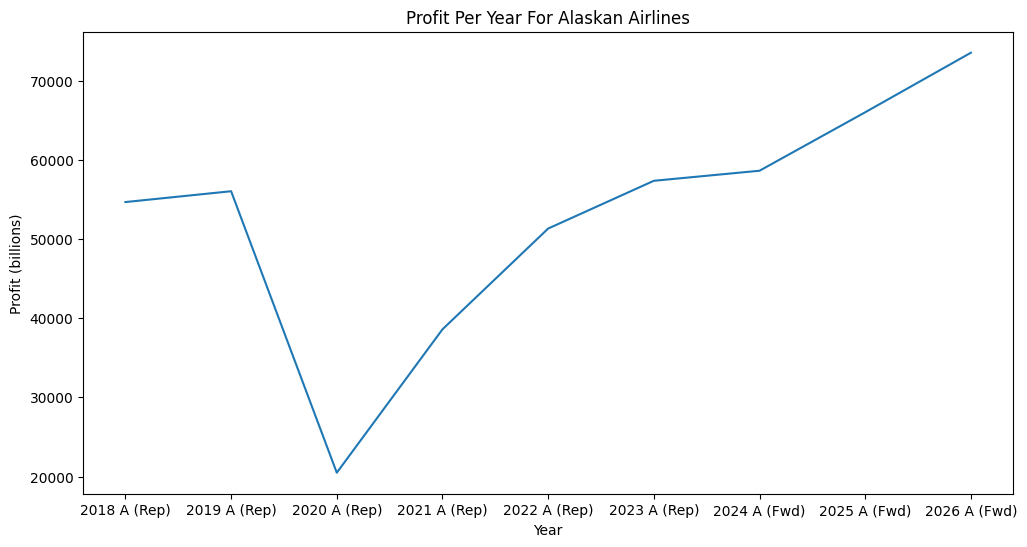

In [74]:
rpm_alaska = data.iloc[9]
rpm_alaska = rpm_alaska[4:]
rpm_alaska = rpm_alaska[::-1]

aa_profit_margin = rpm_alaska - aa_cost_per_asm

plt.figure(figsize=(12, 6))  
plt.plot(years, aa_profit_margin)
plt.title('Profit Per Year For Alaskan Airlines')
plt.xlabel('Year')
plt.ylabel('Profit (billions)')
plt.show()

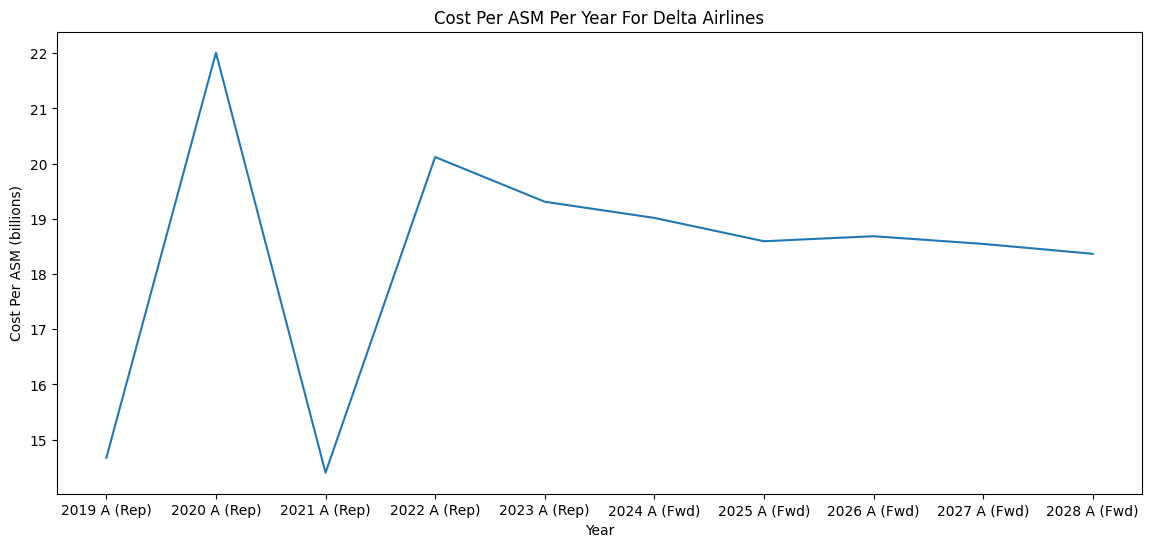

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './AirlineFinancials/Delta_Financials.xlsx' 
sheet_name = 'Multiple Periods' 
data = pd.read_excel(file_path, sheet_name=sheet_name)

years = data.iloc[1]
years = years[4:]
years = years[::-1]
cost_per_asm = data.iloc[23]
cost_per_asm = cost_per_asm[4:]
da_cost_per_asm = cost_per_asm[::-1]

plt.figure(figsize=(14, 6))  
plt.plot(years, da_cost_per_asm)
plt.title('Cost Per ASM Per Year For Delta Airlines')
plt.xlabel('Year')
plt.ylabel('Cost Per ASM (billions)')
plt.show()

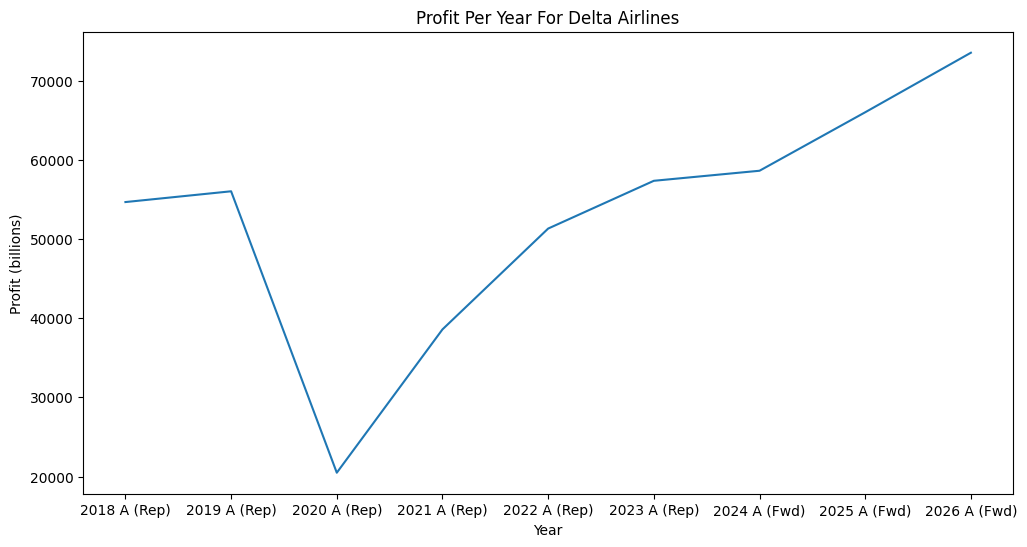

In [76]:
rpm_delta = data.iloc[9]
rpm_delta = rpm_delta[4:]
rpm_delta = rpm_delta[::-1]

da_profit_margin = rpm_delta - da_cost_per_asm

plt.figure(figsize=(12, 6))  
plt.plot(years, da_profit_margin)
plt.title('Profit Per Year For Delta Airlines')
plt.xlabel('Year')
plt.ylabel('Profit (billions)')
plt.show()

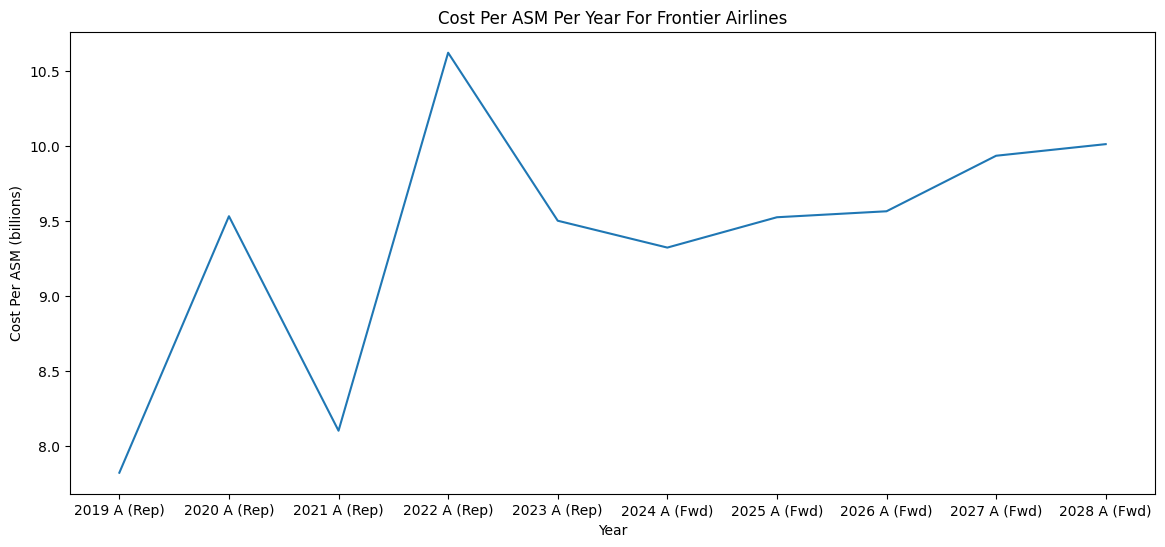

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './AirlineFinancials/Frontier_Financials- Copy.xlsx' 
sheet_name = 'Multiple Periods' 
data = pd.read_excel(file_path, sheet_name=sheet_name)

years = data.iloc[1]
years = years[4:]
years = years[::-1]
cost_per_asm = data.iloc[27]
cost_per_asm = cost_per_asm[4:]
fa_cost_per_asm = cost_per_asm[::-1]

plt.figure(figsize=(14, 6))  
plt.plot(years, fa_cost_per_asm)
plt.title('Cost Per ASM Per Year For Frontier Airlines')
plt.xlabel('Year')
plt.ylabel('Cost Per ASM (billions)')
plt.show()

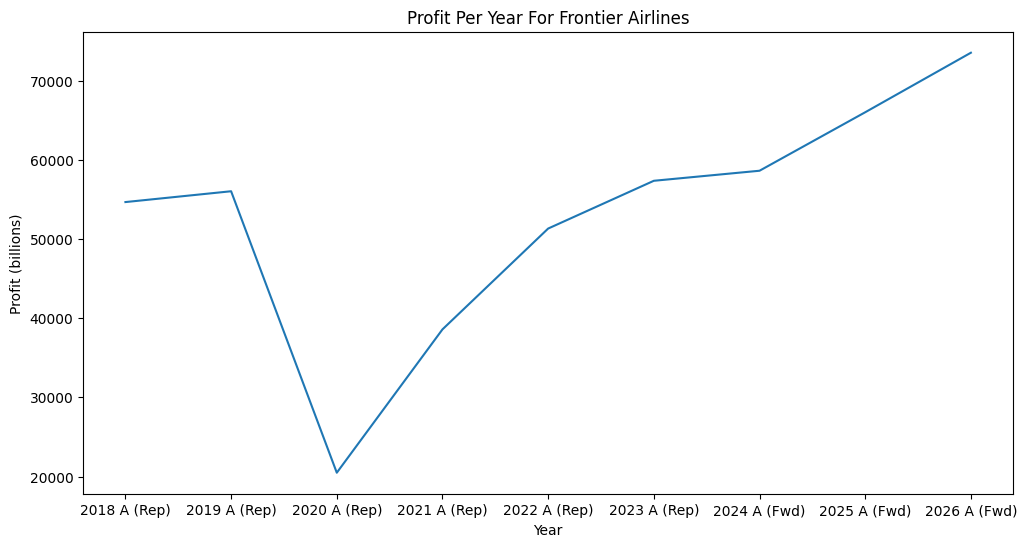

In [78]:
rpm_fa = data.iloc[9]
rpm_fa = rpm_fa[4:]
rpm_fa = rpm_fa[::-1]

fa_profit_margin = rpm_fa - fa_cost_per_asm

plt.figure(figsize=(12, 6))  
plt.plot(years, fa_profit_margin)
plt.title('Profit Per Year For Frontier Airlines')
plt.xlabel('Year')
plt.ylabel('Profit (billions)')
plt.show()

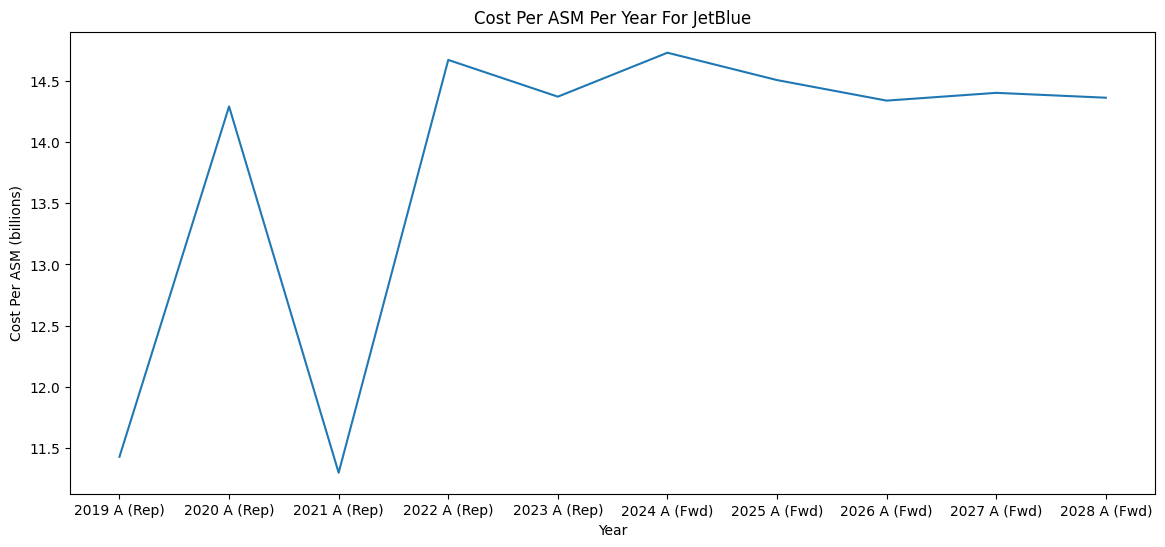

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './AirlineFinancials/JetBlue.xlsx' 
sheet_name = 'Multiple Periods' 
data = pd.read_excel(file_path, sheet_name=sheet_name)

years = data.iloc[1]
years = years[4:]
years = years[::-1]
cost_per_asm = data.iloc[21]
cost_per_asm = cost_per_asm[4:]
jb_cost_per_asm = cost_per_asm[::-1]

plt.figure(figsize=(14, 6))  
plt.plot(years, jb_cost_per_asm)
plt.title('Cost Per ASM Per Year For JetBlue')
plt.xlabel('Year')
plt.ylabel('Cost Per ASM (billions)')
plt.show()

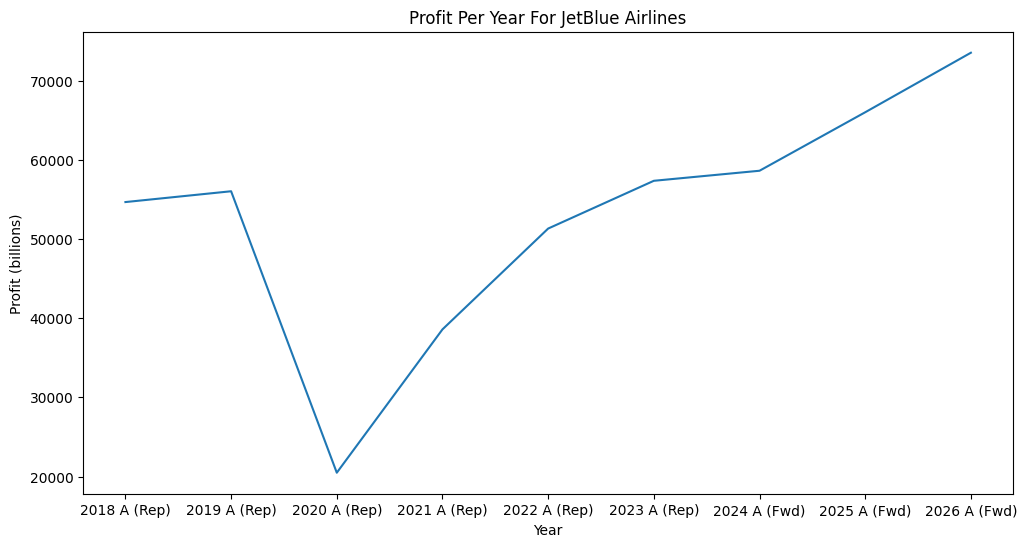

In [79]:
rpm_jb = data.iloc[9]
rpm_jb = rpm_jb[4:]
rpm_jb = rpm_jb[::-1]

jb_profit_margin = rpm_jb - jb_cost_per_asm

plt.figure(figsize=(12, 6))  
plt.plot(years, jb_profit_margin)
plt.title('Profit Per Year For JetBlue Airlines')
plt.xlabel('Year')
plt.ylabel('Profit (billions)')
plt.show()

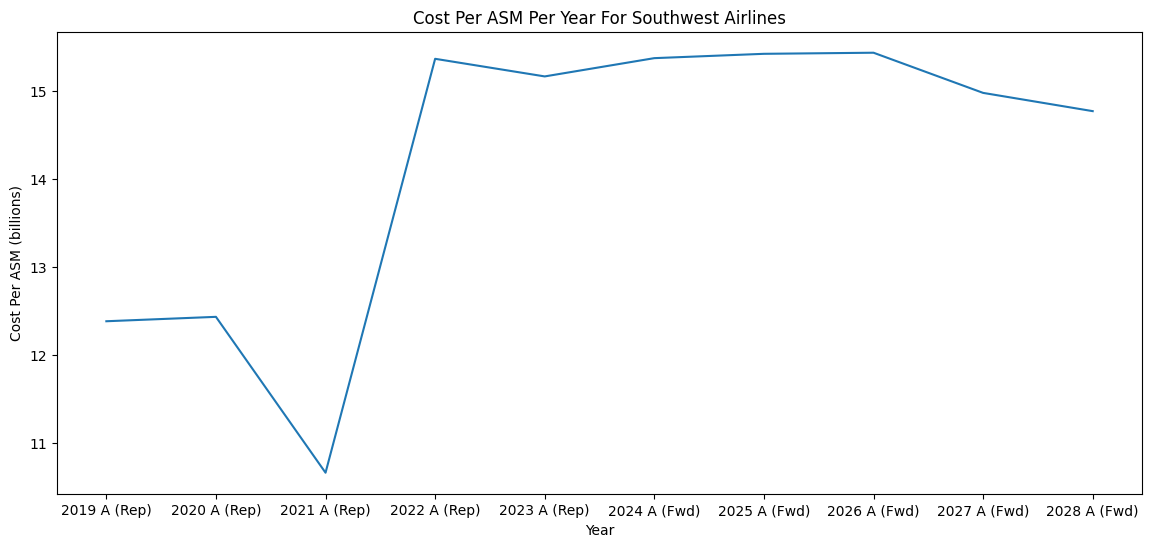

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './AirlineFinancials/Southwest_Financials-Copy.xlsx' 
sheet_name = 'Multiple Periods' 
data = pd.read_excel(file_path, sheet_name=sheet_name)

years = data.iloc[1]
years = years[4:]
years = years[::-1]
cost_per_asm = data.iloc[29]
cost_per_asm = cost_per_asm[4:]
sw_cost_per_asm = cost_per_asm[::-1]

plt.figure(figsize=(14, 6))  
plt.plot(years, sw_cost_per_asm)
plt.title('Cost Per ASM Per Year For Southwest Airlines')
plt.xlabel('Year')
plt.ylabel('Cost Per ASM (billions)')
plt.show()

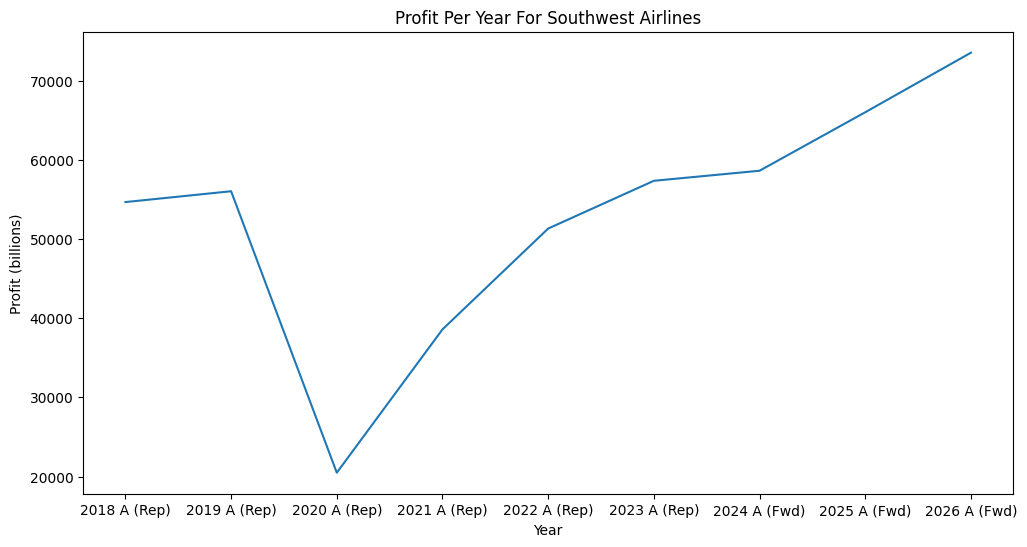

In [81]:
rpm_sw = data.iloc[9]
rpm_sw = rpm_sw[4:]
rpm_sw = rpm_sw[::-1]

sw_profit_margin = rpm_sw - sw_cost_per_asm

plt.figure(figsize=(12, 6))  
plt.plot(years, sw_profit_margin)
plt.title('Profit Per Year For Southwest Airlines')
plt.xlabel('Year')
plt.ylabel('Profit (billions)')
plt.show()

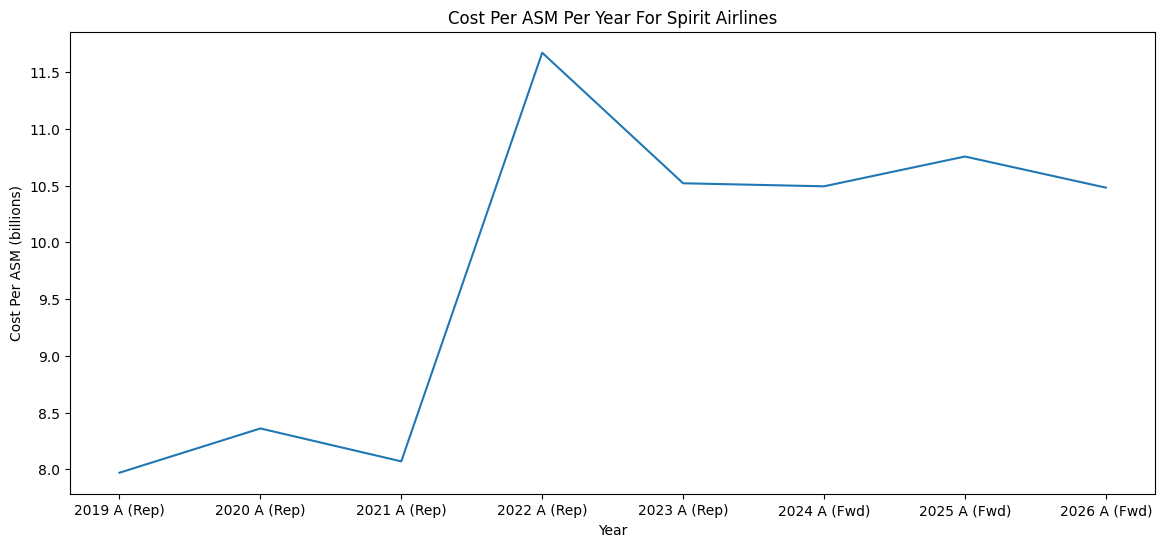

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './AirlineFinancials/Spirit_Financials-Copy.xlsx' 
sheet_name = 'Multiple Periods' 
data = pd.read_excel(file_path, sheet_name=sheet_name)

years = data.iloc[1]
years = years[4:]
years = years[::-1]
cost_per_asm = data.iloc[23]
cost_per_asm = cost_per_asm[4:]
sa_cost_per_asm = cost_per_asm[::-1]

plt.figure(figsize=(14, 6))  
plt.plot(years, sa_cost_per_asm)
plt.title('Cost Per ASM Per Year For Spirit Airlines')
plt.xlabel('Year')
plt.ylabel('Cost Per ASM (billions)')
plt.show()

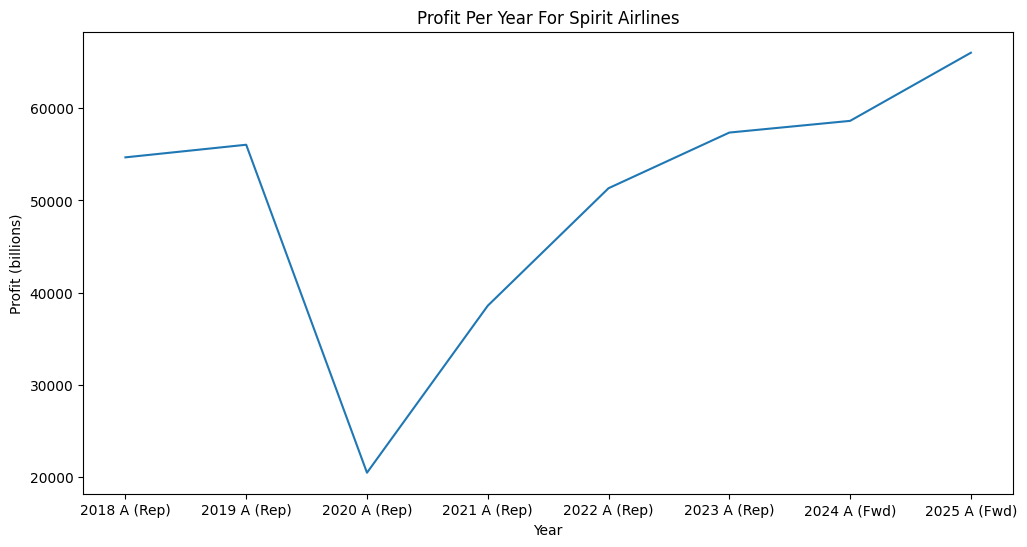

In [82]:
rpm_sa = data.iloc[9]
rpm_sa = rpm_sa[4:]
rpm_sa = rpm_sa[::-1]

sa_profit_margin = rpm_sa - sa_cost_per_asm

plt.figure(figsize=(12, 6))  
plt.plot(years, sa_profit_margin)
plt.title('Profit Per Year For Spirit Airlines')
plt.xlabel('Year')
plt.ylabel('Profit (billions)')
plt.show()

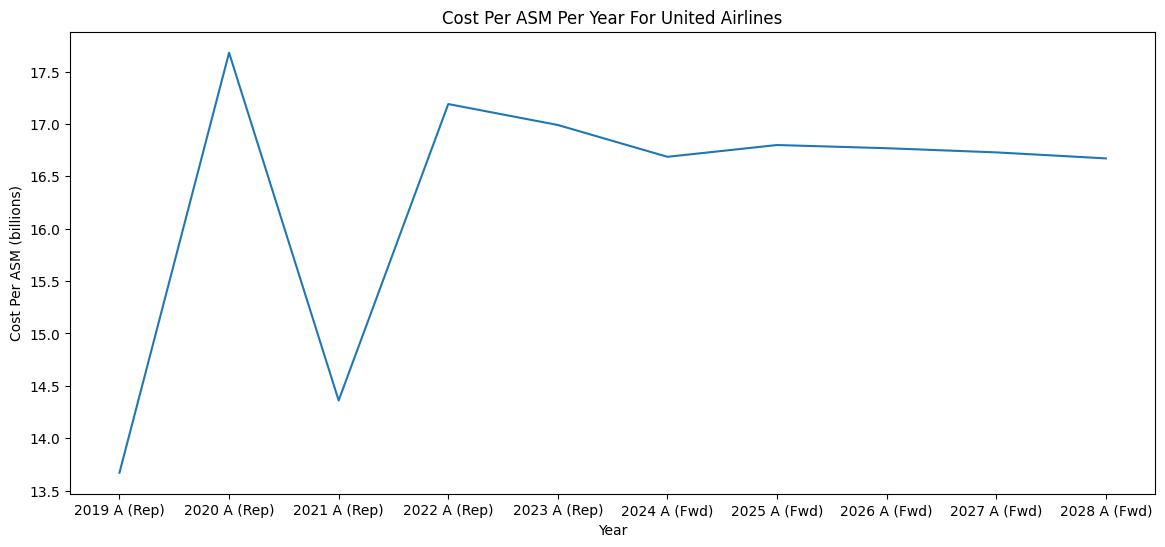

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = './AirlineFinancials/United_Financials.xlsx' 
sheet_name = 'Multiple Periods' 
data = pd.read_excel(file_path, sheet_name=sheet_name)

years = data.iloc[1]
years = years[4:]
years = years[::-1]
cost_per_asm = data.iloc[31]
cost_per_asm = cost_per_asm[4:]
ua_cost_per_asm = cost_per_asm[::-1]

plt.figure(figsize=(14, 6))  
plt.plot(years, ua_cost_per_asm)
plt.title('Cost Per ASM Per Year For United Airlines')
plt.xlabel('Year')
plt.ylabel('Cost Per ASM (billions)')
plt.show()

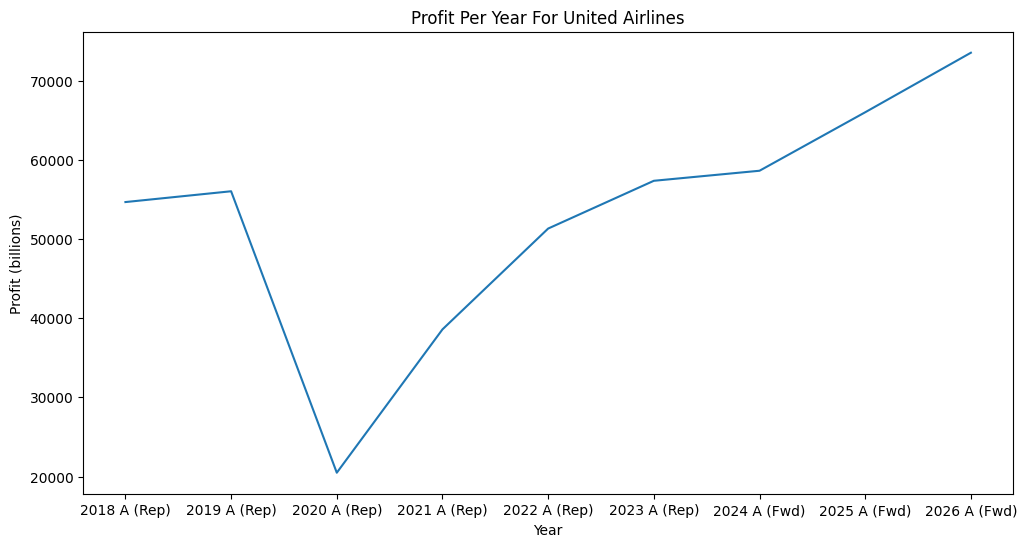

In [84]:
rpm_ua = data.iloc[9]
rpm_ua = rpm_ua[4:]
rpm_ua = rpm_ua[::-1]

ua_profit_margin = rpm_ua - ua_cost_per_asm

plt.figure(figsize=(12, 6))  
plt.plot(years, ua_profit_margin)
plt.title('Profit Per Year For United Airlines')
plt.xlabel('Year')
plt.ylabel('Profit (billions)')
plt.show()

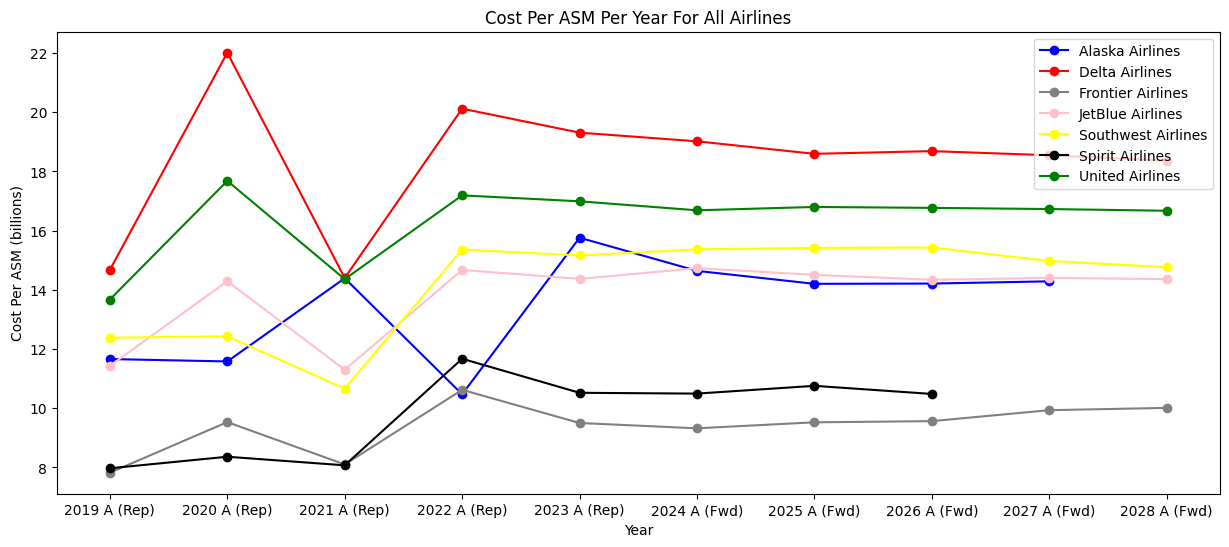

In [62]:
plt.figure(figsize=(15, 6))  

plt.plot(years, aa_cost_per_asm, marker='o', color='blue', label='Alaska Airlines')
plt.plot(years, da_cost_per_asm, marker='o', color='red', label='Delta Airlines')
plt.plot(years, fa_cost_per_asm, marker='o', color='gray', label='Frontier Airlines')
plt.plot(years, jb_cost_per_asm, marker='o', color='pink', label='JetBlue Airlines')
plt.plot(years, sw_cost_per_asm, marker='o', color='yellow', label='Southwest Airlines')
plt.plot(years, sa_cost_per_asm, marker='o', color='black', label='Spirit Airlines')
plt.plot(years, ua_cost_per_asm, marker='o', color='green', label='United Airlines')

plt.title('Cost Per ASM Per Year For All Airlines')
plt.xlabel('Year')
plt.ylabel('Cost Per ASM (billions)')  
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

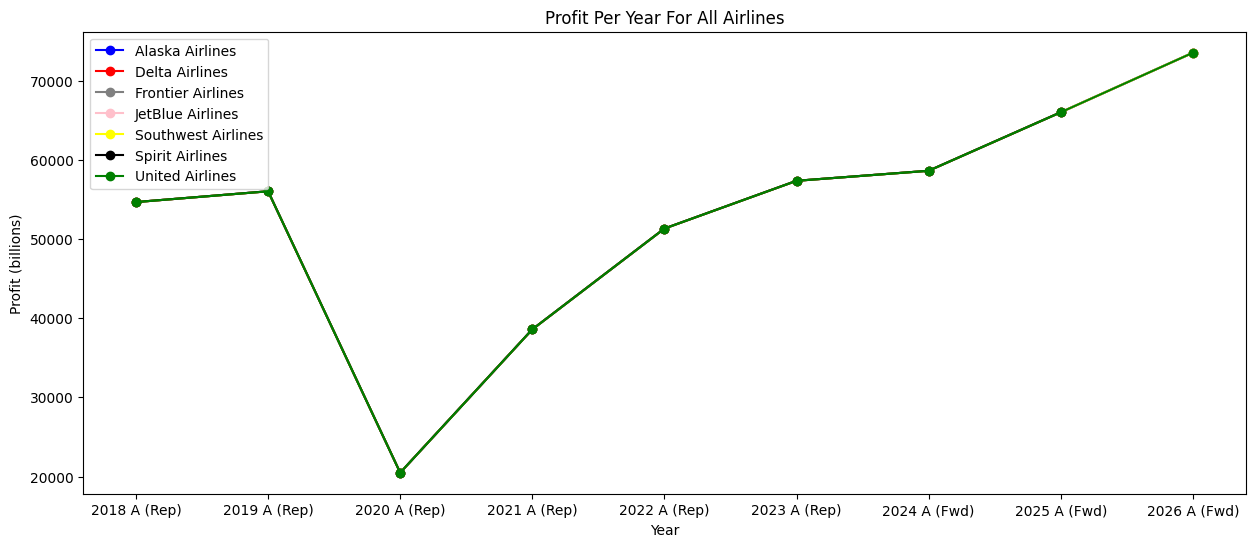

In [97]:
plt.clf()
plt.figure(figsize=(15, 6))  

plt.plot(years, aa_profit_margin, marker='o', color='blue', label='Alaska Airlines')
plt.plot(years, da_profit_margin, marker='o', color='red', label='Delta Airlines')
plt.plot(years, fa_profit_margin, marker='o', color='gray', label='Frontier Airlines')
plt.plot(years, jb_profit_margin, marker='o', color='pink', label='JetBlue Airlines')
plt.plot(years, sw_profit_margin, marker='o', color='yellow', label='Southwest Airlines')
plt.plot(years, sa_profit_margin, marker='o', color='black', label='Spirit Airlines')
plt.plot(years, ua_profit_margin, marker='o', color='green', label='United Airlines')

plt.title('Profit Per Year For All Airlines')
plt.xlabel('Year')
plt.ylabel('Profit (billions)')  
plt.legend()
plt.show()